# Project Description


Detecting Pediatric Acute Lymphoblastic Leukemia using Computer Vision

https://omdena.com/chapter-challenges/detecting-pediatric-acute-lymphoblastic-leukemia-using-computer-vision/

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Required Packages

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.4 MB/s eta 0:00:00


# Imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
  

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import sklearn.metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

import optuna




# Load Data - Batch 4


In [ ]:
!unzip '/content/drive/MyDrive/omdena_liverpool_all/C-NMC_Leukemia/training_test_pickle/batch_4.zip'

Archive:  /content/drive/MyDrive/omdena_liverpool_all/C-NMC_Leukemia/training_test_pickle/batch_4.zip
 extracting: batch_4/class_labels.txt  
  inflating: batch_4/test_data.pickle  
  inflating: batch_4/train_data.pickle  


In [ ]:
df_train = pd.read_pickle('./batch_4/train_data.pickle')
df_test = pd.read_pickle('./batch_4/test_data.pickle')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11917 entries, 0 to 11916
Columns: 4609 entries, 0 to label
dtypes: float32(4608), int32(1)
memory usage: 209.5 MB


In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.185833,0.0,0.00000,0.000000,0.0,0.0,0.0,0.231458,0.0,0.0,...,0.545079,0.170755,0.0,0.096298,0.174819,0.0,0.0,0.361853,0.0,0
1,0.123157,0.0,0.56544,0.350086,0.0,0.0,0.0,0.228849,0.0,0.0,...,0.663390,0.115025,0.0,0.099379,0.516193,0.0,0.0,0.239392,0.0,1
2,0.197977,0.0,0.00000,0.000000,0.0,0.0,0.0,0.155163,0.0,0.0,...,0.663023,0.021846,0.0,0.000000,0.173690,0.0,0.0,0.270634,0.0,1
3,0.580151,0.0,0.00000,0.000000,0.0,0.0,0.0,0.298566,0.0,0.0,...,0.470815,0.000000,0.0,0.000000,0.118325,0.0,0.0,0.000000,0.0,0
4,0.066450,0.0,0.00000,0.000000,0.0,0.0,0.0,0.145156,0.0,0.0,...,0.645798,0.015262,0.0,0.027536,0.275665,0.0,0.0,0.000000,0.0,0


In [ ]:
df_train.shape

(11917, 4609)

In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.141500,0.0,0.000000,0.000000,0.0,0.0,0.0,0.151137,0.0,0.0,...,0.885778,0.066009,0.0,0.169458,0.570154,0.0,0.0,0.090579,0.0,0
1,0.047403,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.649062,0.260996,0.0,0.049776,0.494771,0.0,0.0,0.480568,0.0,0
2,0.000000,0.0,0.000000,0.023559,0.0,0.0,0.0,0.060329,0.0,0.0,...,0.725523,0.166289,0.0,0.131945,0.299330,0.0,0.0,0.000000,0.0,0
3,0.002286,0.0,0.655825,0.259398,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.626934,0.244303,0.0,0.100791,0.448022,0.0,0.0,0.295682,0.0,0
4,0.279953,0.0,0.000000,0.000000,0.0,0.0,0.0,0.168589,0.0,0.0,...,0.489483,0.166786,0.0,0.000000,0.212874,0.0,0.0,0.000000,0.0,0


In [ ]:
df_test.shape

(1794, 4609)

# Create X and y Data to Feed ML Models

In [ ]:
X_train = np.array(df_train.iloc[:,:-1].copy())
y_train = np.array(df_train['label'].copy())

In [ ]:
(X_train.shape, y_train.shape)

((11917, 4608), (11917,))

In [ ]:
X_test = np.array(df_test.iloc[:,:-1].copy())
y_test = np.array(df_test['label'].copy())

In [ ]:
(X_test.shape, y_test.shape)

((1794, 4608), (1794,))

# Classification - Logistic Regression

In [ ]:
clf_lreg = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
y_pred = clf_lreg.predict(X_test)

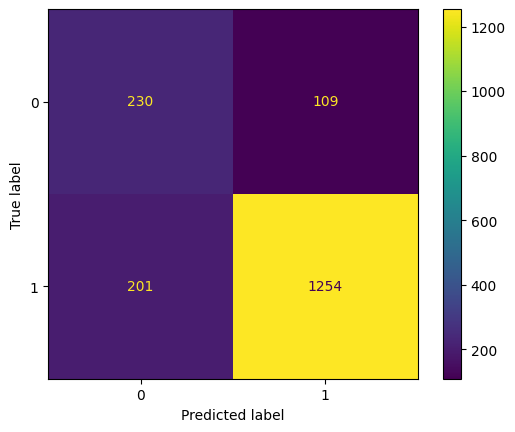

In [ ]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, clf_lreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      6100
           1       0.91      0.94      0.93      5817

    accuracy                           0.93     11917
   macro avg       0.93      0.93      0.93     11917
weighted avg       0.93      0.93      0.93     11917



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       339
           1       0.92      0.86      0.89      1455

    accuracy                           0.83      1794
   macro avg       0.73      0.77      0.74      1794
weighted avg       0.85      0.83      0.83      1794



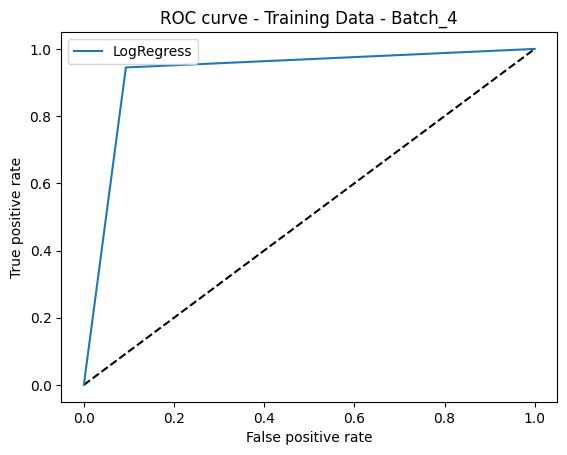

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_train, clf_lreg.predict(X_train))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='LogRegress')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Training Data - Batch_4')
plt.legend(loc='best')
plt.show()

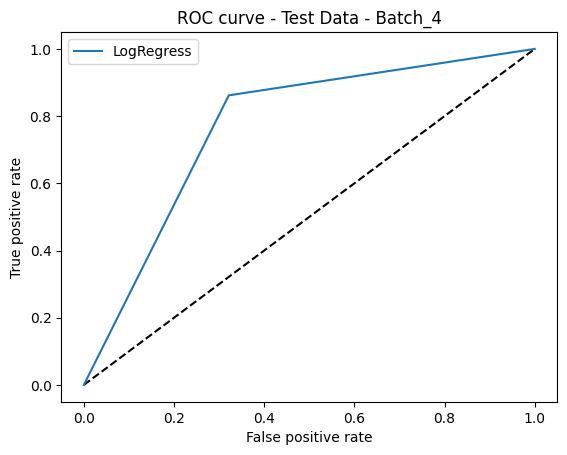

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_lreg.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='LogRegress')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_4')
plt.legend(loc='best')
plt.show()

# Classification - Random Forest

In [ ]:
clf_RF = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [ ]:
clf_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

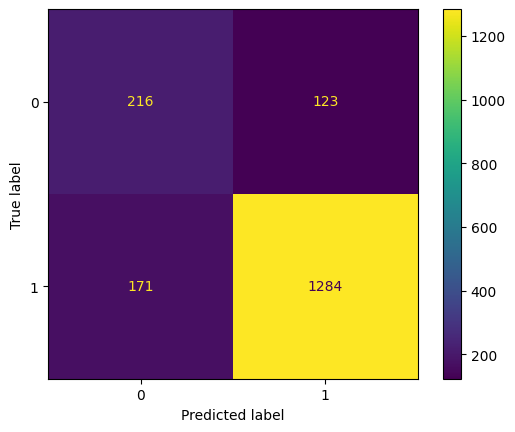

In [ ]:
y_pred = clf_RF.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, clf_RF.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6100
           1       1.00      1.00      1.00      5817

    accuracy                           1.00     11917
   macro avg       1.00      1.00      1.00     11917
weighted avg       1.00      1.00      1.00     11917



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60       339
           1       0.91      0.88      0.90      1455

    accuracy                           0.84      1794
   macro avg       0.74      0.76      0.75      1794
weighted avg       0.85      0.84      0.84      1794



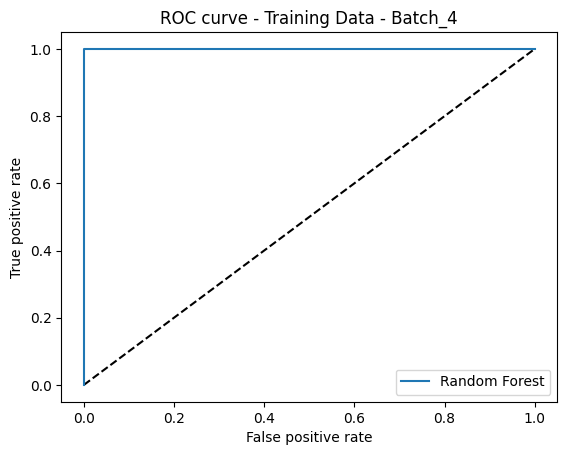

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_train, clf_RF.predict(X_train))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Training Data - Batch_4')
plt.legend(loc='best')
plt.show()

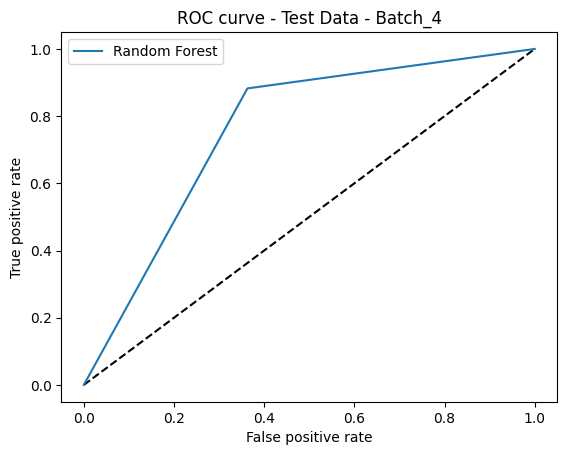

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_RF.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_4')
plt.legend(loc='best')
plt.show()

# Classification - XGBoost

In [ ]:
clf_xgb = XGBClassifier(use_label_encoder=False,eval_metric='logloss',max_depth=50,n_estimators=50,random_state=2023)
clf_xgb.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=50,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=2023, ...)

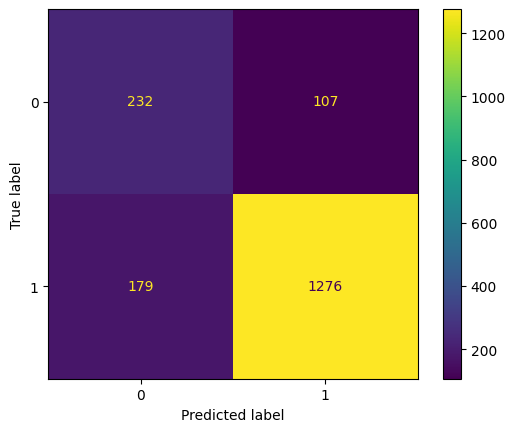

In [ ]:
y_pred = clf_xgb.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, clf_xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6100
           1       1.00      1.00      1.00      5817

    accuracy                           1.00     11917
   macro avg       1.00      1.00      1.00     11917
weighted avg       1.00      1.00      1.00     11917



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.68      0.62       339
           1       0.92      0.88      0.90      1455

    accuracy                           0.84      1794
   macro avg       0.74      0.78      0.76      1794
weighted avg       0.85      0.84      0.85      1794



# Hyperparameter Tuning - Optuna


https://medium.com/optuna/using-optuna-to-optimize-xgboost-hyperparameters-63bfcdfd3407


## Objective Function for Optuna - XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
def objective(trial):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    param = {
        'n_estimators'      : trial.suggest_int('n_estimators', 50, 500),
        'max_depth'         : trial.suggest_int('max_depth', 50, 500),
        'learning_rate'     : trial.suggest_float('learning_rate', 0.001, 1),
        'verbosity'         : 1,
        'random_state'      : 42,
        'extra_trees'       : True,
        "objective"         : "binary:logistic",
        "eval_metric"       : "auc",
        "booster"           : trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda"            : trial.suggest_float("lambda", 1e-8, 1.0),
        "alpha"             : trial.suggest_float("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0)

    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    return accuracy

## Run Optuna

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=1000)

[I 2023-04-13 11:21:10,976] A new study created in memory with name: no-name-068822c3-71ab-4041-a603-770372fb79af


[11:21:11] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73062
[1]	validation-auc:0.74125
[2]	validation-auc:0.76045
[3]	validation-auc:0.77831
[4]	validation-auc:0.78693
[5]	validation-auc:0.79466
[6]	validation-auc:0.79776
[7]	validation-auc:0.79708
[8]	validation-auc:0.80031
[9]	validation-auc:0.80343


[I 2023-04-13 11:22:54,162] Trial 0 finished with value: 0.7948717948717948 and parameters: {'n_estimators': 209, 'max_depth': 449, 'learning_rate': 0.06783995261991273, 'booster': 'dart', 'lambda': 0.45859539861452364, 'alpha': 0.9617754002347482, 'eta': 0.7847511344061694, 'gamma': 0.8914811529963291, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.8785772694580658, 'skip_drop': 0.771870453330727}. Best is trial 0 with value: 0.7948717948717948.


[11:22:55] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000
[1]	validation-auc:0.50000
[2]	validation-auc:0.50000
[3]	validation-auc:0.50000
[4]	validation-auc:0.50000
[5]	validation-auc:0.50000
[6]	validation-auc:0.50000
[7]	validation-auc:0.50000
[8]	validation-auc:0.50000
[9]	validation-auc:0.50000


[I 2023-04-13 11:22:57,466] Trial 1 finished with value: 0.18896321070234115 and parameters: {'n_estimators': 373, 'max_depth': 373, 'learning_rate': 0.18878244879369668, 'booster': 'gblinear', 'lambda': 0.5225131127107652, 'alpha': 0.3130392717020851}. Best is trial 0 with value: 0.7948717948717948.


[11:22:58] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73154
[1]	validation-auc:0.75303
[2]	validation-auc:0.77142
[3]	validation-auc:0.78574
[4]	validation-auc:0.79176
[5]	validation-auc:0.79662
[6]	validation-auc:0.79940
[7]	validation-auc:0.80519
[8]	validation-auc:0.80826
[9]	validation-auc:0.81347


[I 2023-04-13 11:24:08,054] Trial 2 finished with value: 0.8082497212931996 and parameters: {'n_estimators': 382, 'max_depth': 139, 'learning_rate': 0.5210436833223696, 'booster': 'gbtree', 'lambda': 0.9306582440125677, 'alpha': 0.45382182440731333, 'eta': 0.13670813391848582, 'gamma': 0.559317705579118, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8082497212931996.


[11:24:08] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000
[1]	validation-auc:0.50000
[2]	validation-auc:0.50000
[3]	validation-auc:0.50000
[4]	validation-auc:0.50000
[5]	validation-auc:0.50000
[6]	validation-auc:0.50000
[7]	validation-auc:0.50000
[8]	validation-auc:0.50000
[9]	validation-auc:0.50000


[I 2023-04-13 11:24:10,647] Trial 3 finished with value: 0.18896321070234115 and parameters: {'n_estimators': 92, 'max_depth': 279, 'learning_rate': 0.7980428664933821, 'booster': 'gblinear', 'lambda': 0.9138281385364738, 'alpha': 0.6161361675108082}. Best is trial 2 with value: 0.8082497212931996.


[11:24:11] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72943
[1]	validation-auc:0.75777
[2]	validation-auc:0.77550
[3]	validation-auc:0.78461
[4]	validation-auc:0.79432
[5]	validation-auc:0.80034
[6]	validation-auc:0.80209
[7]	validation-auc:0.80608
[8]	validation-auc:0.81136
[9]	validation-auc:0.81203


[I 2023-04-13 11:25:14,094] Trial 4 finished with value: 0.798216276477146 and parameters: {'n_estimators': 398, 'max_depth': 468, 'learning_rate': 0.8056536727257742, 'booster': 'gbtree', 'lambda': 0.37435128373335524, 'alpha': 0.801008896323205, 'eta': 0.011651229445668763, 'gamma': 0.9713384174159163, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8082497212931996.


[11:25:15] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73085
[1]	validation-auc:0.76133
[2]	validation-auc:0.75234
[3]	validation-auc:0.76795


[I 2023-04-13 11:25:54,882] Trial 5 pruned. Trial was pruned at iteration 3.


[11:25:56] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-13 11:25:57,130] Trial 6 pruned. Trial was pruned at iteration 0.


[11:25:58] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.74112
[1]	validation-auc:0.74865
[2]	validation-auc:0.77465
[3]	validation-auc:0.79238
[4]	validation-auc:0.80179
[5]	validation-auc:0.80625
[6]	validation-auc:0.80945
[7]	validation-auc:0.81229
[8]	validation-auc:0.81377
[9]	validation-auc:0.81582


[I 2023-04-13 11:27:05,890] Trial 7 finished with value: 0.798216276477146 and parameters: {'n_estimators': 495, 'max_depth': 406, 'learning_rate': 0.7991072068756226, 'booster': 'gbtree', 'lambda': 0.24195785512217527, 'alpha': 0.5313110538145337, 'eta': 0.9133247906244315, 'gamma': 0.6113545268833096, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8082497212931996.


[11:27:07] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-13 11:27:18,409] Trial 8 pruned. Trial was pruned at iteration 0.


[11:27:19] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-13 11:27:20,501] Trial 9 pruned. Trial was pruned at iteration 0.


[11:27:21] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-13 11:27:31,123] Trial 10 pruned. Trial was pruned at iteration 0.


[11:27:32] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73391
[1]	validation-auc:0.76399
[2]	validation-auc:0.79090
[3]	validation-auc:0.80474
[4]	validation-auc:0.81630
[5]	validation-auc:0.81785
[6]	validation-auc:0.82201
[7]	validation-auc:0.82133
[8]	validation-auc:0.82004
[9]	validation-auc:0.81915


[I 2023-04-13 11:28:38,874] Trial 11 finished with value: 0.7993311036789298 and parameters: {'n_estimators': 446, 'max_depth': 138, 'learning_rate': 0.6061310987099447, 'booster': 'gbtree', 'lambda': 0.6990133123849342, 'alpha': 0.7494350964510551, 'eta': 0.010311123835091945, 'gamma': 0.9796853394847794, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8082497212931996.


[11:28:39] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73597
[1]	validation-auc:0.76520
[2]	validation-auc:0.77720
[3]	validation-auc:0.79301
[4]	validation-auc:0.80255
[5]	validation-auc:0.80720
[6]	validation-auc:0.81348
[7]	validation-auc:0.81767
[8]	validation-auc:0.82075
[9]	validation-auc:0.82644


[I 2023-04-13 11:29:54,555] Trial 12 finished with value: 0.8160535117056856 and parameters: {'n_estimators': 491, 'max_depth': 118, 'learning_rate': 0.5734408762582545, 'booster': 'gbtree', 'lambda': 0.7543696124864167, 'alpha': 0.7590016616913465, 'eta': 0.24348819510443373, 'gamma': 0.3805880436191422, 'grow_policy': 'lossguide'}. Best is trial 12 with value: 0.8160535117056856.


[11:29:55] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73255
[1]	validation-auc:0.75601
[2]	validation-auc:0.77492
[3]	validation-auc:0.79074
[4]	validation-auc:0.79759
[5]	validation-auc:0.80575
[6]	validation-auc:0.81180
[7]	validation-auc:0.81850
[8]	validation-auc:0.82267
[9]	validation-auc:0.82372


[I 2023-04-13 11:31:06,178] Trial 13 finished with value: 0.8171683389074693 and parameters: {'n_estimators': 500, 'max_depth': 162, 'learning_rate': 0.5500388244958505, 'booster': 'gbtree', 'lambda': 0.9497707470545131, 'alpha': 0.6932318576292608, 'eta': 0.3097434255697108, 'gamma': 0.3950933837134097, 'grow_policy': 'lossguide'}. Best is trial 13 with value: 0.8171683389074693.


[11:31:07] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73202
[1]	validation-auc:0.77077
[2]	validation-auc:0.79605
[3]	validation-auc:0.80934
[4]	validation-auc:0.81616
[5]	validation-auc:0.82215
[6]	validation-auc:0.82640
[7]	validation-auc:0.82695
[8]	validation-auc:0.82697
[9]	validation-auc:0.82886


[I 2023-04-13 11:32:15,036] Trial 14 finished with value: 0.8182831661092531 and parameters: {'n_estimators': 489, 'max_depth': 203, 'learning_rate': 0.622107307413558, 'booster': 'gbtree', 'lambda': 0.7965775448775266, 'alpha': 0.7062272830332902, 'eta': 0.35196680086062293, 'gamma': 0.3060599220585563, 'grow_policy': 'lossguide'}. Best is trial 14 with value: 0.8182831661092531.


[11:32:15] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-13 11:32:28,927] Trial 15 pruned. Trial was pruned at iteration 0.


[11:32:29] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73974
[1]	validation-auc:0.75758
[2]	validation-auc:0.78054
[3]	validation-auc:0.79473
[4]	validation-auc:0.81084
[5]	validation-auc:0.81778
[6]	validation-auc:0.82176
[7]	validation-auc:0.82638
[8]	validation-auc:0.83134
[9]	validation-auc:0.83314


[I 2023-04-13 11:33:49,322] Trial 16 finished with value: 0.8216276477146043 and parameters: {'n_estimators': 453, 'max_depth': 208, 'learning_rate': 0.4113658168508172, 'booster': 'dart', 'lambda': 0.8092482278879187, 'alpha': 0.8615699181871486, 'eta': 0.5028673708555346, 'gamma': 0.3441683987664652, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.010688990181732583, 'skip_drop': 0.9511230983330283}. Best is trial 16 with value: 0.8216276477146043.


[11:33:50] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.74005
[1]	validation-auc:0.76240
[2]	validation-auc:0.78558
[3]	validation-auc:0.80288
[4]	validation-auc:0.81765
[5]	validation-auc:0.82628
[6]	validation-auc:0.83418
[7]	validation-auc:0.83605
[8]	validation-auc:0.84011
[9]	validation-auc:0.84396


[I 2023-04-13 11:35:14,016] Trial 17 finished with value: 0.8216276477146043 and parameters: {'n_estimators': 445, 'max_depth': 229, 'learning_rate': 0.35097613067871325, 'booster': 'dart', 'lambda': 0.8055016037642846, 'alpha': 0.8226929418581664, 'eta': 0.5764064288767756, 'gamma': 0.1785600381526364, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.09517376545636841, 'skip_drop': 0.9890855843345003}. Best is trial 16 with value: 0.8216276477146043.


[11:35:14] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73458
[1]	validation-auc:0.77401
[2]	validation-auc:0.78721
[3]	validation-auc:0.79450
[4]	validation-auc:0.80439
[5]	validation-auc:0.81011
[6]	validation-auc:0.81682
[7]	validation-auc:0.82017
[8]	validation-auc:0.82325
[9]	validation-auc:0.82805


[I 2023-04-13 11:36:35,940] Trial 18 finished with value: 0.8182831661092531 and parameters: {'n_estimators': 317, 'max_depth': 265, 'learning_rate': 0.34970482520131274, 'booster': 'dart', 'lambda': 0.6448801853675402, 'alpha': 0.8405620984198057, 'eta': 0.5576519601823817, 'gamma': 0.0562627371301172, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.017906709106633556, 'skip_drop': 0.9951872654665285}. Best is trial 16 with value: 0.8216276477146043.


[11:36:36] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.74030
[1]	validation-auc:0.75118


[I 2023-04-13 11:37:01,932] Trial 19 pruned. Trial was pruned at iteration 1.


[11:37:02] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73980
[1]	validation-auc:0.75957
[2]	validation-auc:0.77946
[3]	validation-auc:0.79843
[4]	validation-auc:0.81251
[5]	validation-auc:0.81594
[6]	validation-auc:0.82296
[7]	validation-auc:0.82934
[8]	validation-auc:0.82833
[9]	validation-auc:0.83265


[I 2023-04-13 11:38:21,383] Trial 20 finished with value: 0.8149386845039019 and parameters: {'n_estimators': 340, 'max_depth': 57, 'learning_rate': 0.4344212379731184, 'booster': 'dart', 'lambda': 0.8436596103976466, 'alpha': 0.9873425646399763, 'eta': 0.6300271054344653, 'gamma': 0.006105269738469088, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.05973478383331464, 'skip_drop': 0.6507708625031297}. Best is trial 16 with value: 0.8216276477146043.


## Best XGBoost Model from Optuna

In [ ]:
study.best_params

{'n_estimators': 453,
 'max_depth': 208,
 'learning_rate': 0.4113658168508172,
 'booster': 'dart',
 'lambda': 0.8092482278879187,
 'alpha': 0.8615699181871486,
 'eta': 0.5028673708555346,
 'gamma': 0.3441683987664652,
 'grow_policy': 'lossguide',
 'sample_type': 'uniform',
 'normalize_type': 'forest',
 'rate_drop': 0.010688990181732583,
 'skip_drop': 0.9511230983330283}

In [ ]:
clf_xgb_opt= XGBClassifier(**study.best_params)

In [ ]:
clf_xgb_opt.fit(X_train, y_train)

XGBClassifier(alpha=0.8615699181871486, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5028673708555346,
              eval_metric=None, feature_types=None, gamma=0.3441683987664652,
              gpu_id=None, grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, lambda=0.8092482278879187,
              learning_rate=0.4113658168508172, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=208, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=453, n_jobs=None, ...)

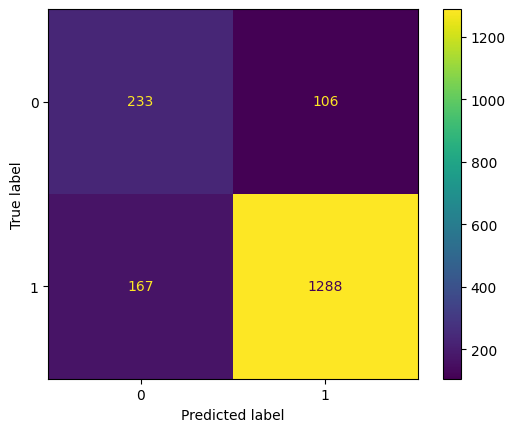

In [ ]:
y_pred = clf_xgb_opt.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, clf_xgb_opt.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6100
           1       1.00      1.00      1.00      5817

    accuracy                           1.00     11917
   macro avg       1.00      1.00      1.00     11917
weighted avg       1.00      1.00      1.00     11917



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63       339
           1       0.92      0.89      0.90      1455

    accuracy                           0.85      1794
   macro avg       0.75      0.79      0.77      1794
weighted avg       0.86      0.85      0.85      1794



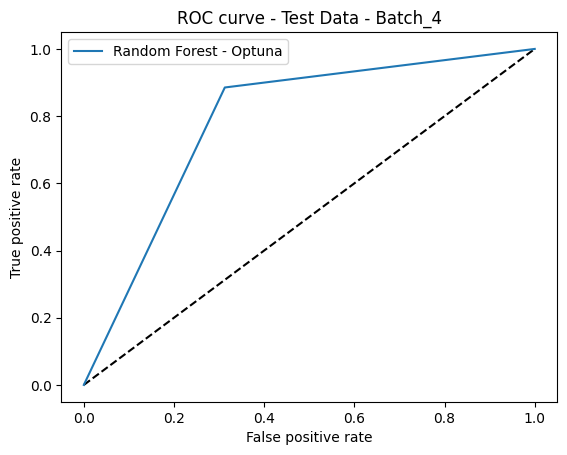

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_xgb_opt.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest - Optuna')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_4')
plt.legend(loc='best')
plt.show()